In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import pyperclip
import warnings
warnings.filterwarnings('ignore')

## DATAFRAMES POR INSTANCIA

In [38]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free
0,a05100,5,100,1709.0,0.790583,0,3206.0,0.529875,0,1700.0,...,0,1699.0,33.89680,0,1703.0,30,0,1712.0,23.252700,0
1,a20100,20,100,1170.0,0.072791,0,2972.0,0.304375,0,1168.0,...,0,1166.0,30.95420,0,1167.0,47,0,1184.0,58.855600,0
2,a10100,10,100,1390.0,0.052584,0,2954.0,0.158542,0,1367.0,...,0,1360.0,23.62030,0,1362.0,24,0,1373.0,34.064000,0
3,a05200,5,200,3259.0,0.080416,0,6075.0,0.189000,0,3238.0,...,0,3235.0,116.17400,0,3235.0,50,0,3236.0,111.927000,0
4,a20200,20,200,2371.0,0.147333,0,5855.0,0.607166,0,2353.0,...,0,2347.0,201.52400,0,2358.0,147,0,2362.0,250.544000,0
5,a10200,10,200,2670.0,0.101584,0,6183.0,0.314834,0,2637.0,...,0,2630.0,168.85400,0,2634.0,105,0,2634.0,174.974000,0
6,b10200,10,200,8255.0,0.100000,42,6031.0,0.324250,0,7792.0,...,32,3018.0,151.12100,0,2929.0,97,0,3192.0,116.459000,0
7,b20200,20,200,3628.0,0.156208,7,5860.0,0.607334,0,3338.0,...,0,2410.0,224.96700,0,2418.0,131,0,2421.0,246.330000,0
8,b05200,5,200,8050.0,0.067875,40,6059.0,0.189333,0,7493.0,...,38,3638.0,111.03900,0,3319.0,91,0,3922.0,68.047000,0
9,b10100,10,100,2115.0,0.050792,4,2980.0,0.159084,0,1949.0,...,0,1439.0,25.61750,0,1433.0,17,0,1472.0,26.244500,0


In [39]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Tabu', 'RVND'],
      dtype='object')

In [40]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
0,a05100,5,100,1709.0,0.790583,0,3206.0,0.529875,0,1700.0,...,1699.0,33.89680,0,1703.0,30,0,1712.0,23.252700,0,a
1,a20100,20,100,1170.0,0.072791,0,2972.0,0.304375,0,1168.0,...,1166.0,30.95420,0,1167.0,47,0,1184.0,58.855600,0,a
2,a10100,10,100,1390.0,0.052584,0,2954.0,0.158542,0,1367.0,...,1360.0,23.62030,0,1362.0,24,0,1373.0,34.064000,0,a
3,a05200,5,200,3259.0,0.080416,0,6075.0,0.189000,0,3238.0,...,3235.0,116.17400,0,3235.0,50,0,3236.0,111.927000,0,a
4,a20200,20,200,2371.0,0.147333,0,5855.0,0.607166,0,2353.0,...,2347.0,201.52400,0,2358.0,147,0,2362.0,250.544000,0,a
5,a10200,10,200,2670.0,0.101584,0,6183.0,0.314834,0,2637.0,...,2630.0,168.85400,0,2634.0,105,0,2634.0,174.974000,0,a
6,b10200,10,200,8255.0,0.100000,42,6031.0,0.324250,0,7792.0,...,3018.0,151.12100,0,2929.0,97,0,3192.0,116.459000,0,b
7,b20200,20,200,3628.0,0.156208,7,5860.0,0.607334,0,3338.0,...,2410.0,224.96700,0,2418.0,131,0,2421.0,246.330000,0,b
8,b05200,5,200,8050.0,0.067875,40,6059.0,0.189333,0,7493.0,...,3638.0,111.03900,0,3319.0,91,0,3922.0,68.047000,0,b
9,b10100,10,100,2115.0,0.050792,4,2980.0,0.159084,0,1949.0,...,1439.0,25.61750,0,1433.0,17,0,1472.0,26.244500,0,b


In [41]:
# Separo las instancias
a_instance = df[df["InstanceGroup"] == "a"]
b_instance = df[df["InstanceGroup"] == "b"]
e_instance = df[df["InstanceGroup"] == "e"]
real_instance = df[df["InstanceGroup"] == "r"]


In [42]:
len(df)

28

In [43]:
# join a_instance[['Depositos', 'Vendedores']] with b_instance[['Depositos', 'Vendedores']] with e_instance[['Depositos', 'Vendedores']] with real_instance[['Depositos', 'Vendedores']]

# rename columns

a_table = a_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_a', 'Vendedores': 'Vendedores_a'}).reset_index(drop=True)
b_table = b_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_b', 'Vendedores': 'Vendedores_b'}).reset_index(drop=True)
e_table = e_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_e', 'Vendedores': 'Vendedores_e'}).reset_index(drop=True)

# join tables
table = pd.concat([a_table, b_table, e_table], axis=1).fillna("")
print(table.to_markdown(index=False))

| Depositos_a   | Vendedores_a   | Depositos_b   | Vendedores_b   |   Depositos_e |   Vendedores_e |
|:--------------|:---------------|:--------------|:---------------|--------------:|---------------:|
| 5.0           | 100.0          | 10.0          | 200.0          |            40 |           1600 |
| 20.0          | 100.0          | 20.0          | 200.0          |            15 |            900 |
| 10.0          | 100.0          | 5.0           | 200.0          |            60 |            900 |
| 5.0           | 200.0          | 10.0          | 100.0          |            80 |           1600 |
| 20.0          | 200.0          | 20.0          | 100.0          |            30 |            900 |
| 10.0          | 200.0          | 5.0           | 100.0          |            40 |            400 |
|               |                |               |                |            20 |           1600 |
|               |                |               |                |            20 |        

In [44]:
# Get "Depositos", "Vendedores" columns from a instance
print(e_instance[['Depositos', 'Vendedores']].to_markdown(index=False))

|   Depositos |   Vendedores |
|------------:|-------------:|
|          40 |         1600 |
|          15 |          900 |
|          60 |          900 |
|          80 |         1600 |
|          30 |          900 |
|          40 |          400 |
|          20 |         1600 |
|          20 |          400 |
|          10 |          400 |
|           5 |          100 |
|          10 |          100 |
|          20 |          100 |
|           5 |          200 |
|          10 |          200 |
|          20 |          200 |


In [45]:
instances = df["InstanceGroup"].unique()

## Costo de cada instancia

In [46]:
# COSTO DE CADA INSTANCIA
costs = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "free", filter it

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('time')], axis=1, inplace=True)

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('free')], axis=1, inplace=True)



In [47]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Tabu', 'RVND'],
      dtype='object')

In [48]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
0,a05100,5,100,1709.0,0.790583,0,3206.0,0.529875,0,1700.0,...,1699.0,33.89680,0,1703.0,30,0,1712.0,23.252700,0,a
1,a20100,20,100,1170.0,0.072791,0,2972.0,0.304375,0,1168.0,...,1166.0,30.95420,0,1167.0,47,0,1184.0,58.855600,0,a
2,a10100,10,100,1390.0,0.052584,0,2954.0,0.158542,0,1367.0,...,1360.0,23.62030,0,1362.0,24,0,1373.0,34.064000,0,a
3,a05200,5,200,3259.0,0.080416,0,6075.0,0.189000,0,3238.0,...,3235.0,116.17400,0,3235.0,50,0,3236.0,111.927000,0,a
4,a20200,20,200,2371.0,0.147333,0,5855.0,0.607166,0,2353.0,...,2347.0,201.52400,0,2358.0,147,0,2362.0,250.544000,0,a
5,a10200,10,200,2670.0,0.101584,0,6183.0,0.314834,0,2637.0,...,2630.0,168.85400,0,2634.0,105,0,2634.0,174.974000,0,a
6,b10200,10,200,8255.0,0.100000,42,6031.0,0.324250,0,7792.0,...,3018.0,151.12100,0,2929.0,97,0,3192.0,116.459000,0,b
7,b20200,20,200,3628.0,0.156208,7,5860.0,0.607334,0,3338.0,...,2410.0,224.96700,0,2418.0,131,0,2421.0,246.330000,0,b
8,b05200,5,200,8050.0,0.067875,40,6059.0,0.189333,0,7493.0,...,3638.0,111.03900,0,3319.0,91,0,3922.0,68.047000,0,b
9,b10100,10,100,2115.0,0.050792,4,2980.0,0.159084,0,1949.0,...,1439.0,25.61750,0,1433.0,17,0,1472.0,26.244500,0,b


## Tiempo de cada instancia

In [49]:
# COSTO DE CADA INSTANCIA
times = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "cost" or "free", filter it

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('cost')], axis=1, inplace=True)

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('free')], axis=1, inplace=True)

times[0]

,Filename,Depositos,Vendedores,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Tabu_time,RVND_time,InstanceGroup
0,a05100,5,100,0.790583,0.529875,3.99113,33.6619,0.927333,4.29204,2.44325,5.57400,4.05600,33.8968,30,23.2527,a
1,a20100,20,100,0.072791,0.304375,1.16412,27.1212,0.198791,11.82520,1.26471,12.20200,1.40383,30.9542,47,58.8556,a
2,a10100,10,100,0.052584,0.158542,1.77833,22.7228,0.122168,5.65987,1.84179,6.02246,1.95354,23.6203,24,34.0640,a
3,a05200,5,200,0.080416,0.189000,5.88008,115.6150,0.159791,8.84275,5.96138,14.54610,5.95921,116.1740,50,111.9270,a
4,a20200,20,200,0.147333,0.607166,7.06254,192.6050,0.386749,43.64910,7.28108,49.09960,7.29871,201.5240,147,250.5440,a
5,a10200,10,200,0.101584,0.314834,10.54560,166.4490,0.233126,20.90840,10.67810,24.90570,10.77580,168.8540,105,174.9740,a


## Vendedores sin asignar de cada instancia

In [50]:
# Libres
frees = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "cost", filter it

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('cost')], axis=1, inplace=True)

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('time')], axis=1, inplace=True)

frees[0]

,Filename,Depositos,Vendedores,Greedy_free,Binpacking_free,Swap(Greedy)_free,Swap(Bin Packing)_free,Relocate(Greedy)_free,Relocate(Bin Packing)_free,Swap+Relocate(Greedy)_free,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_free,Tabu_free,RVND_free,InstanceGroup
0,a05100,5,100,0,0,0,0,0,0,0,0,0,0,0,0,a
1,a20100,20,100,0,0,0,0,0,0,0,0,0,0,0,0,a
2,a10100,10,100,0,0,0,0,0,0,0,0,0,0,0,0,a
3,a05200,5,200,0,0,0,0,0,0,0,0,0,0,0,0,a
4,a20200,20,200,0,0,0,0,0,0,0,0,0,0,0,0,a
5,a10200,10,200,0,0,0,0,0,0,0,0,0,0,0,0,a


In [51]:
# Print de las instancias
display(Markdown('## Instancia A'))
display(a_instance)

display(Markdown('## Instancia B'))
display(b_instance)

display(Markdown('## Instancia E'))
display(e_instance)

display(Markdown('## Instancia Real'))
display(real_instance)

## Instancia A

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
0,a05100,5,100,1709.0,0.790583,0,3206.0,0.529875,0,1700.0,...,1699.0,33.8968,0,1703.0,30,0,1712.0,23.2527,0,a
1,a20100,20,100,1170.0,0.072791,0,2972.0,0.304375,0,1168.0,...,1166.0,30.9542,0,1167.0,47,0,1184.0,58.8556,0,a
2,a10100,10,100,1390.0,0.052584,0,2954.0,0.158542,0,1367.0,...,1360.0,23.6203,0,1362.0,24,0,1373.0,34.0640,0,a
3,a05200,5,200,3259.0,0.080416,0,6075.0,0.189000,0,3238.0,...,3235.0,116.1740,0,3235.0,50,0,3236.0,111.9270,0,a
4,a20200,20,200,2371.0,0.147333,0,5855.0,0.607166,0,2353.0,...,2347.0,201.5240,0,2358.0,147,0,2362.0,250.5440,0,a
5,a10200,10,200,2670.0,0.101584,0,6183.0,0.314834,0,2637.0,...,2630.0,168.8540,0,2634.0,105,0,2634.0,174.9740,0,a


## Instancia B

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
6,b10200,10,200,8255.0,0.100000,42,6031.0,0.324250,0,7792.0,...,3018.0,151.12100,0,2929.0,97,0,3192.0,116.459000,0,b
7,b20200,20,200,3628.0,0.156208,7,5860.0,0.607334,0,3338.0,...,2410.0,224.96700,0,2418.0,131,0,2421.0,246.330000,0,b
8,b05200,5,200,8050.0,0.067875,40,6059.0,0.189333,0,7493.0,...,3638.0,111.03900,0,3319.0,91,0,3922.0,68.047000,0,b
9,b10100,10,100,2115.0,0.050792,4,2980.0,0.159084,0,1949.0,...,1439.0,25.61750,0,1433.0,17,0,1472.0,26.244500,0,b
10,b20100,20,100,1660.0,0.076333,2,3006.0,0.295000,0,1512.0,...,1270.0,29.10450,0,1227.0,31,0,1227.0,55.415000,0,b
11,b05100,5,100,4972.0,0.032500,27,2979.0,0.095000,0,4677.0,...,1975.0,9.19338,0,1879.0,15,0,2797.0,0.941125,1,b


## Instancia E

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
12,e401600,40,1600,3550530.0,1.386330,1186,1496530.0,9.270630,0,3528030.0,...,1219880.0,65910.40000,0,1258460.0,10270,0,1268340.0,14808.20000,0,e
13,e15900,15,900,1675160.0,0.363708,628,681052.0,2.056920,0,1665010.0,...,517875.0,9486.45000,0,256295.0,3123,0,563950.0,2712.13000,0,e
14,e60900,60,900,1879710.0,1.162710,615,868102.0,7.692500,0,1867650.0,...,666152.0,13740.60000,0,701895.0,3973,0,699379.0,4272.82000,0,e
15,e801600,80,1600,3559140.0,2.867040,1167,1563090.0,20.486900,0,3534770.0,...,1242620.0,81654.40000,0,1296980.0,14467,0,1292360.0,19811.90000,0,e
16,e30900,30,900,1900960.0,0.656583,643,807924.0,3.965210,0,1891080.0,...,639291.0,10997.80000,0,394976.0,3315,0,665097.0,3193.92000,0,e
17,e40400,40,400,739996.0,0.393500,239,368473.0,2.309670,0,733090.0,...,254764.0,1022.77000,0,274607.0,517,0,271669.0,587.50100,0,e
18,e201600,20,1600,3261900.0,0.817625,1164,1350790.0,4.866670,0,3251500.0,...,1080850.0,58734.40000,0,1113570.0,8433,0,1101920.0,14405.90000,0,e
19,e20400,20,400,746075.0,0.204250,265,320970.0,1.189880,0,741282.0,...,228911.0,896.44300,0,240098.0,498,0,255160.0,360.73600,0,e
20,e10400,10,400,633169.0,0.126375,261,272013.0,0.656958,0,628707.0,...,186807.0,734.32500,0,193841.0,487,0,201768.0,280.57800,0,e
21,e05100,5,100,92769.0,0.027250,46,53515.0,0.093250,0,91233.0,...,24232.0,9.91617,0,26893.0,12,0,28916.0,8.37458,0,e


## Instancia Real

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
27,real_instance,310,1100,964.9,8.59667,0,10629.0,36.0392,0,824.8,...,757.6,65975.9,0,795.6,41893,0,717.8,105995.0,0,r


## GRAFICOS

### 1. COSTOS

In [52]:
# row 10 from df

df.iloc[1]

Filename                             a20100
Depositos                                20
Vendedores                              100
Greedy_cost                          1170.0
Greedy_time                        0.072791
Greedy_free                               0
Binpacking_cost                      2972.0
Binpacking_time                    0.304375
Binpacking_free                           0
Swap(Greedy)_cost                    1168.0
Swap(Greedy)_time                   1.16412
Swap(Greedy)_free                         0
Swap(Bin Packing)_cost               1263.0
Swap(Bin Packing)_time              27.1212
Swap(Bin Packing)_free                    0
Relocate(Greedy)_cost                1170.0
Relocate(Greedy)_time              0.198791
Relocate(Greedy)_free                     0
Relocate(Bin Packing)_cost           1167.0
Relocate(Bin Packing)_time          11.8252
Relocate(Bin Packing)_free                0
Swap+Relocate(Greedy)_cost           1168.0
Swap+Relocate(Greedy)_time      

In [53]:
# how many rows in df
len(df)

28

Text(0.5, 0.98, 'Instancia A - Costo')

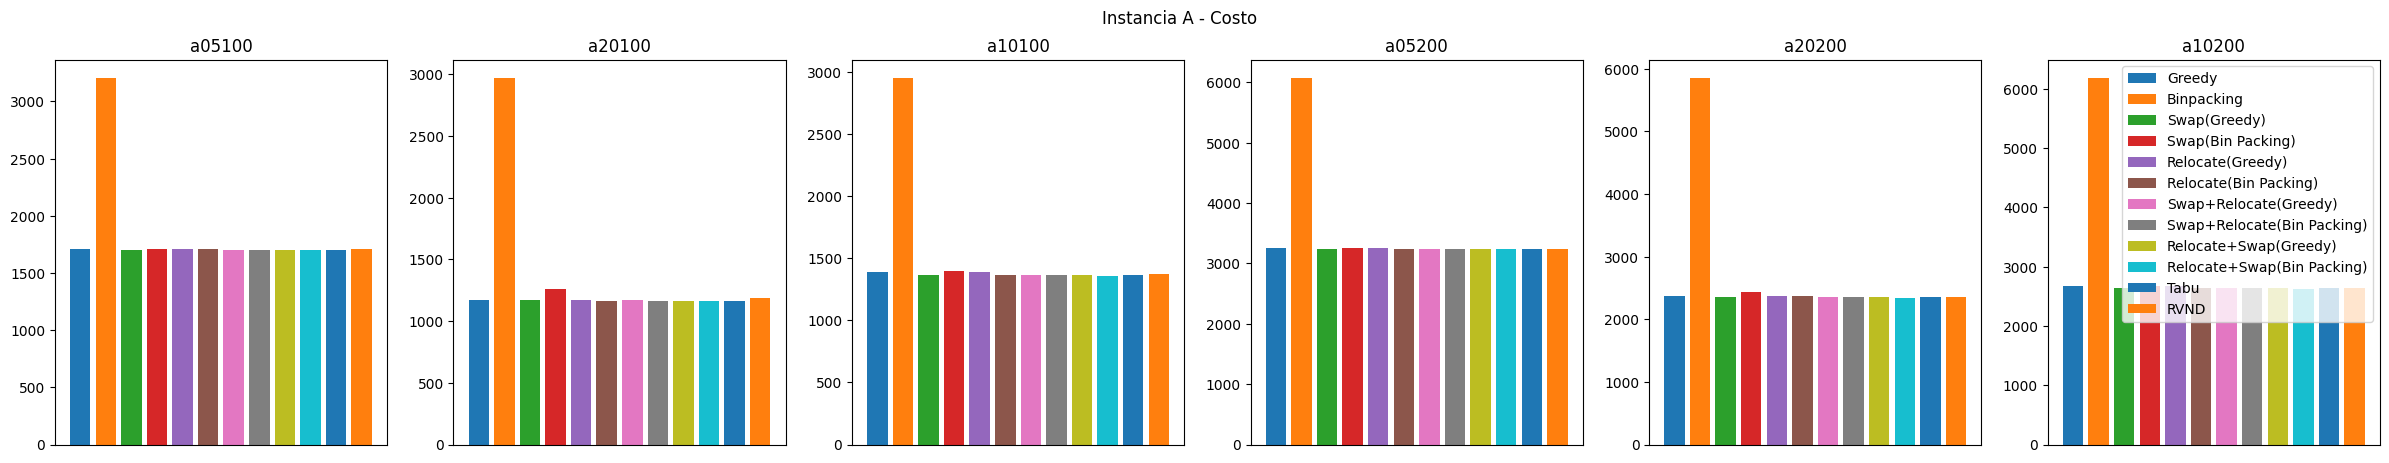

In [54]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Costo")

Text(0.5, 0.98, 'Instancia B - Costo')

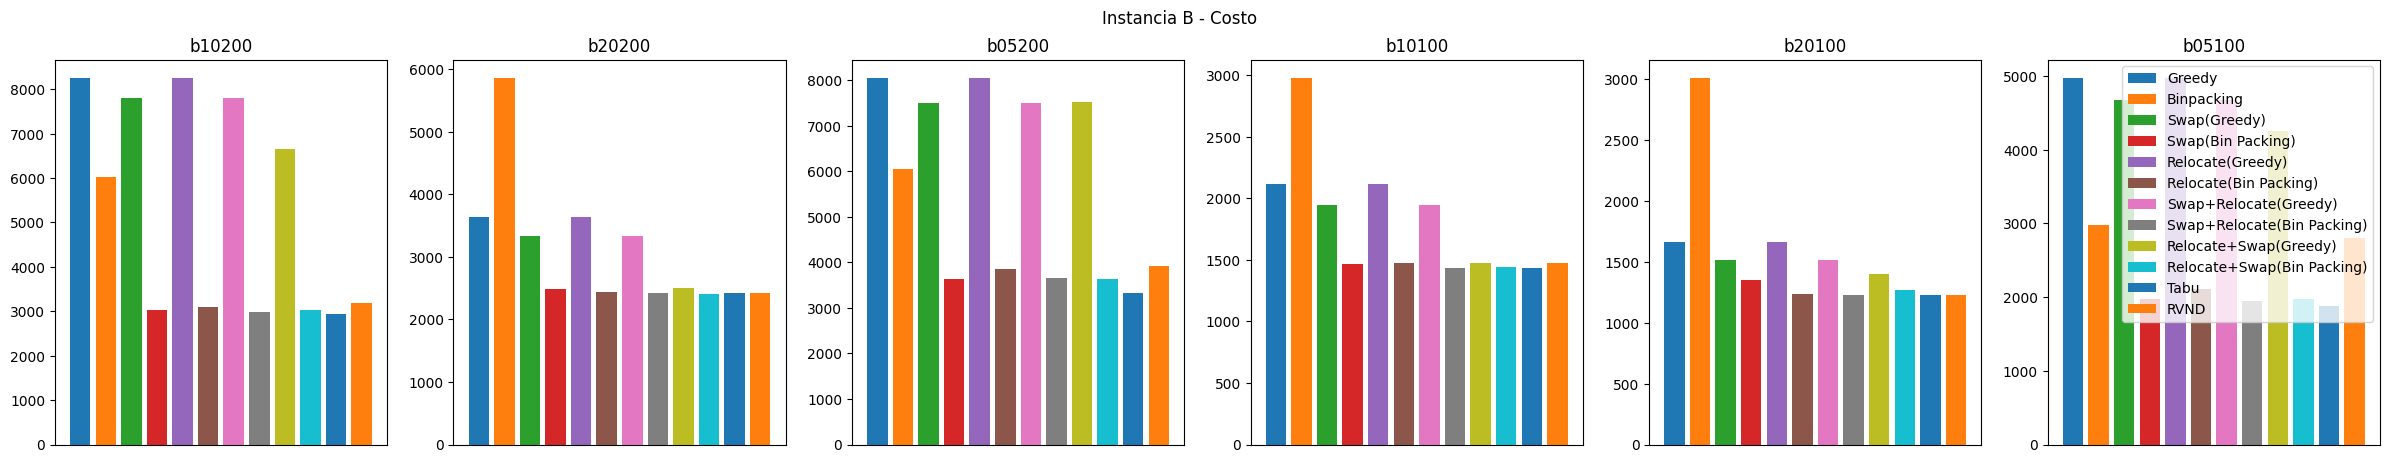

In [55]:
fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Costo")

Text(0.5, 0.98, 'Instancia E - Costo')

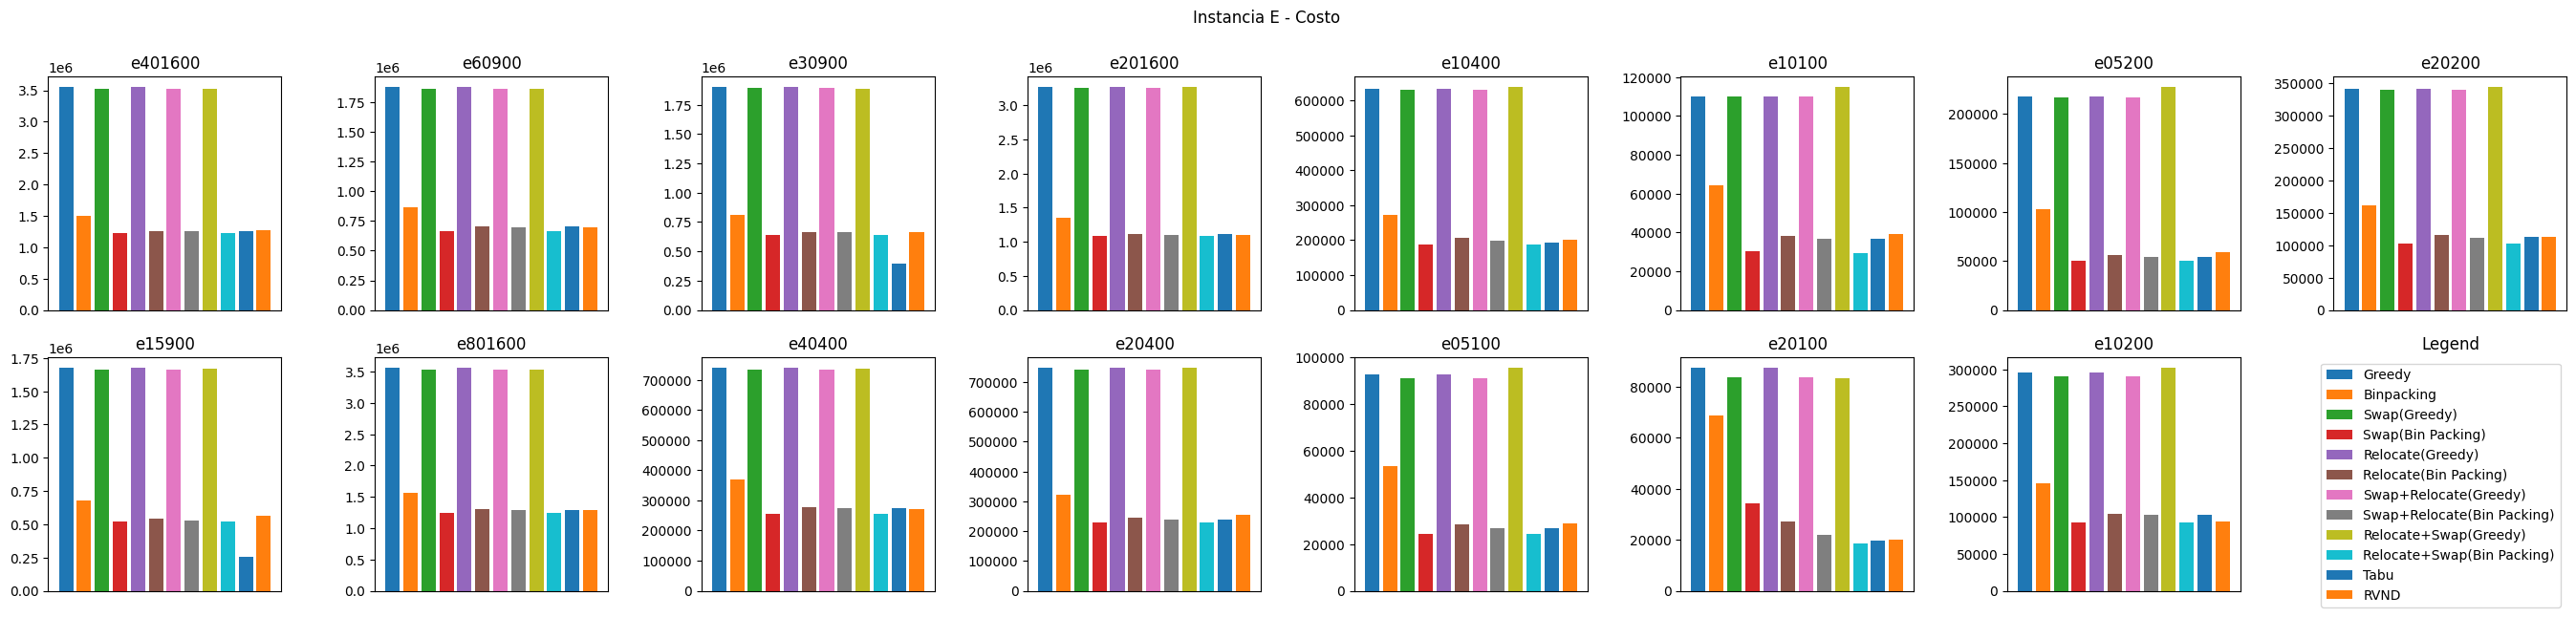

In [56]:
fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Costo")

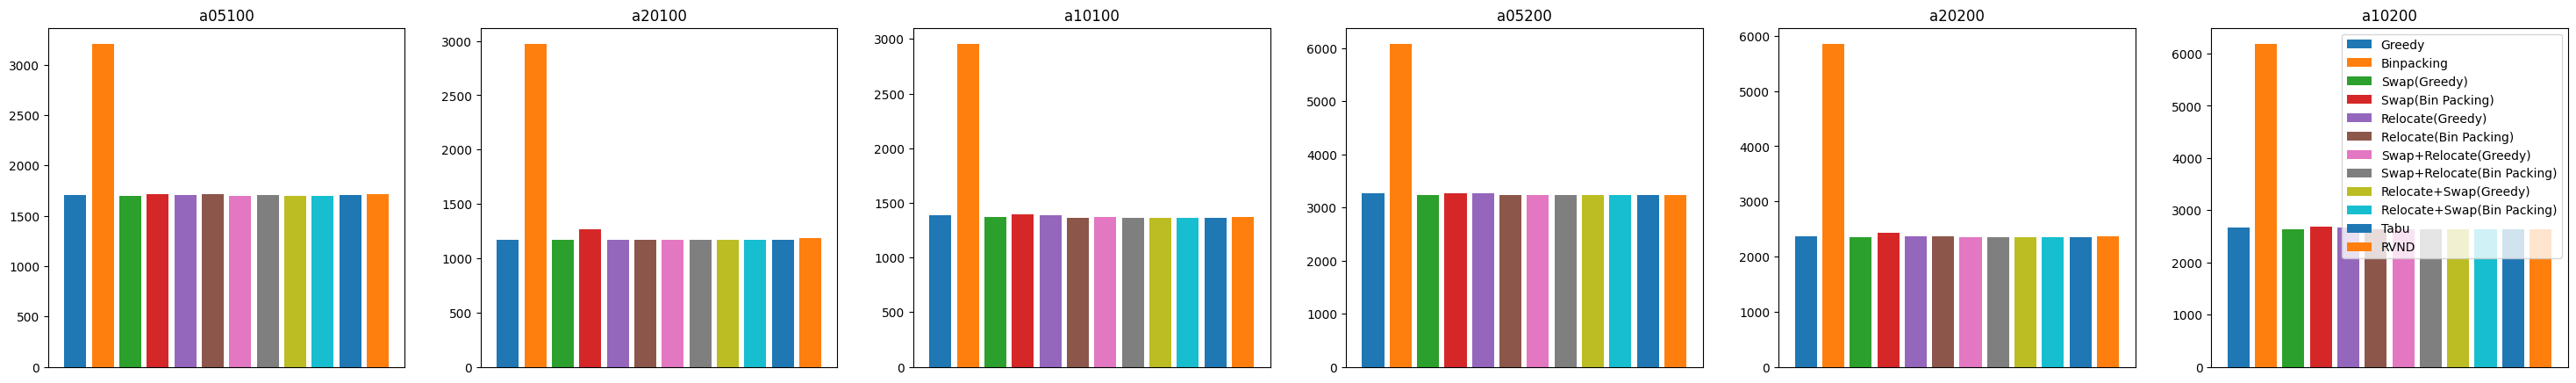

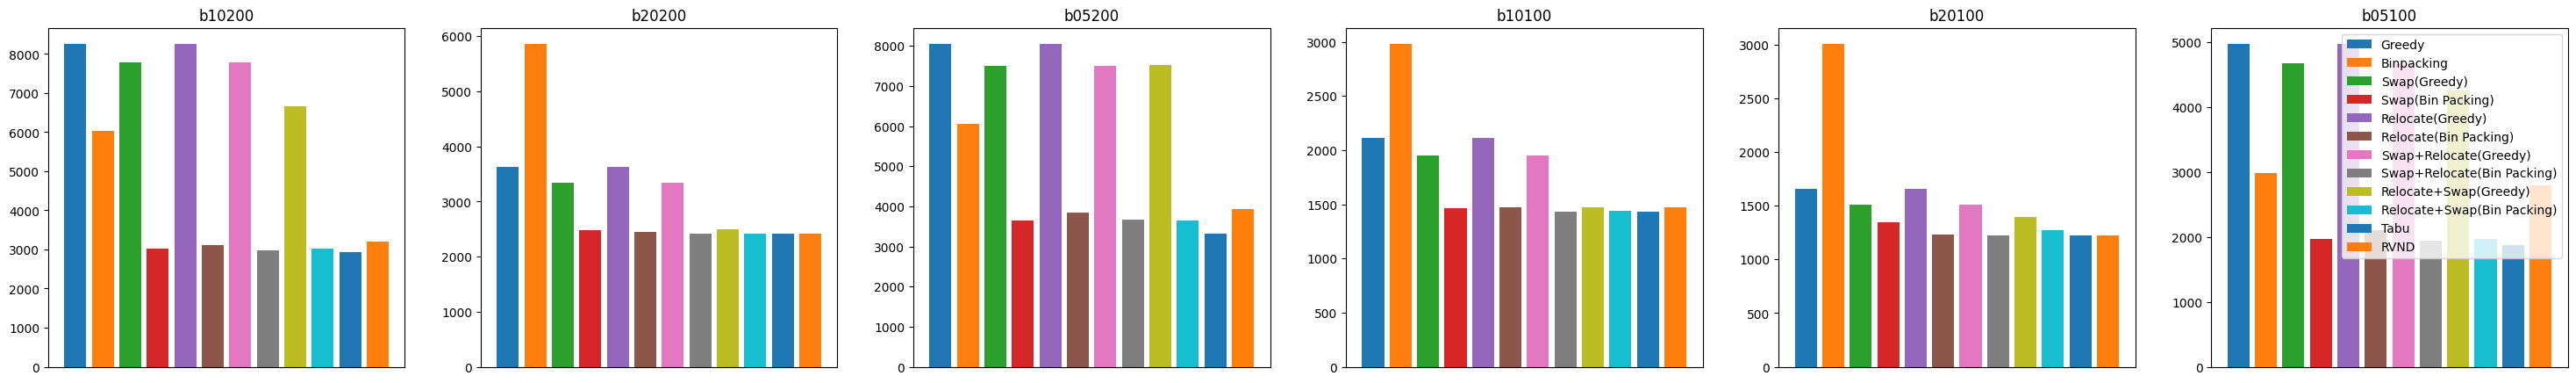

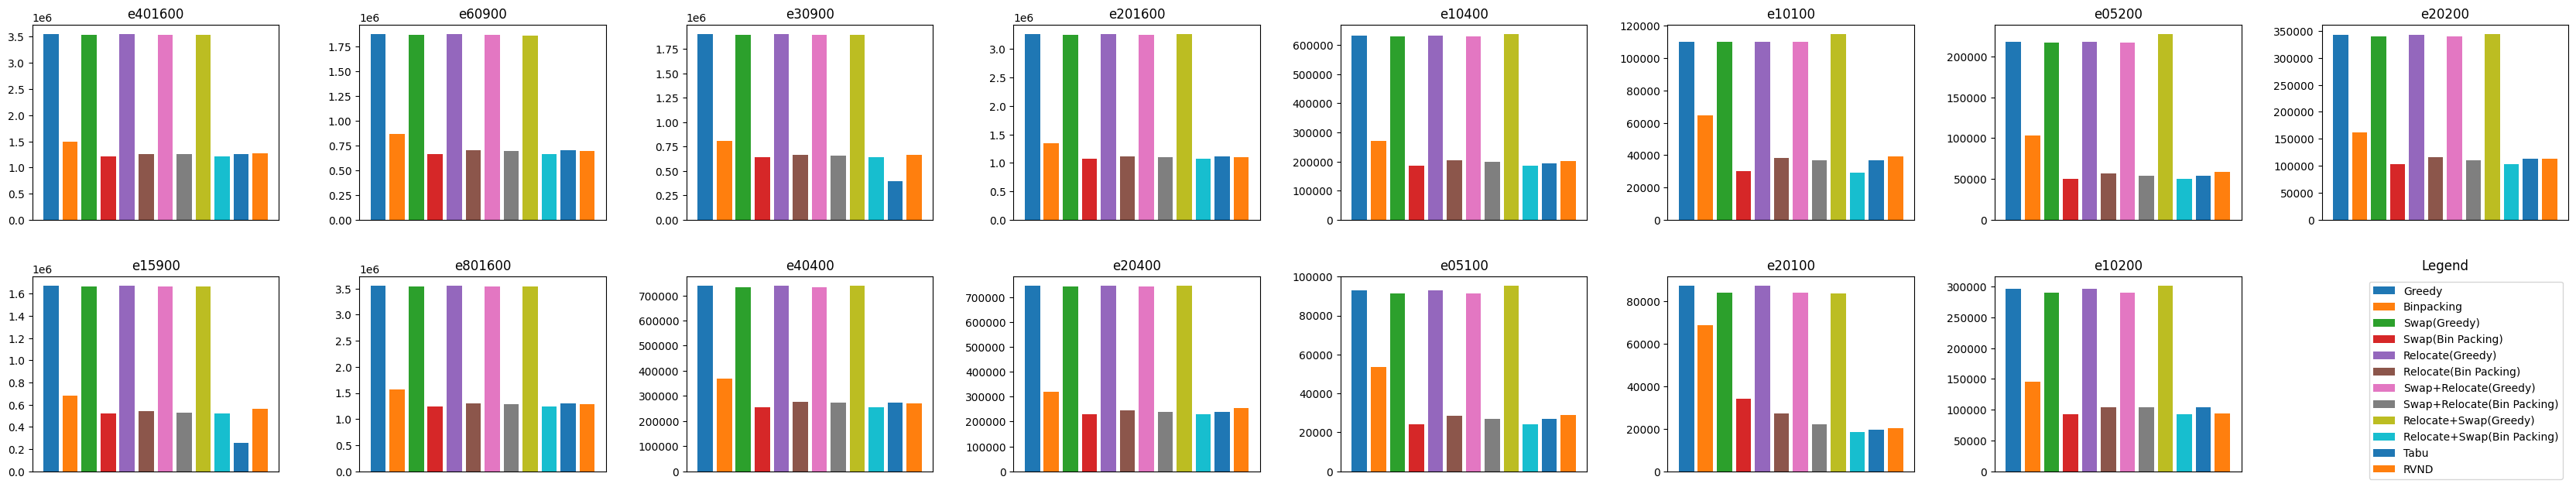

In [57]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_costo.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_costo.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_costo.png")

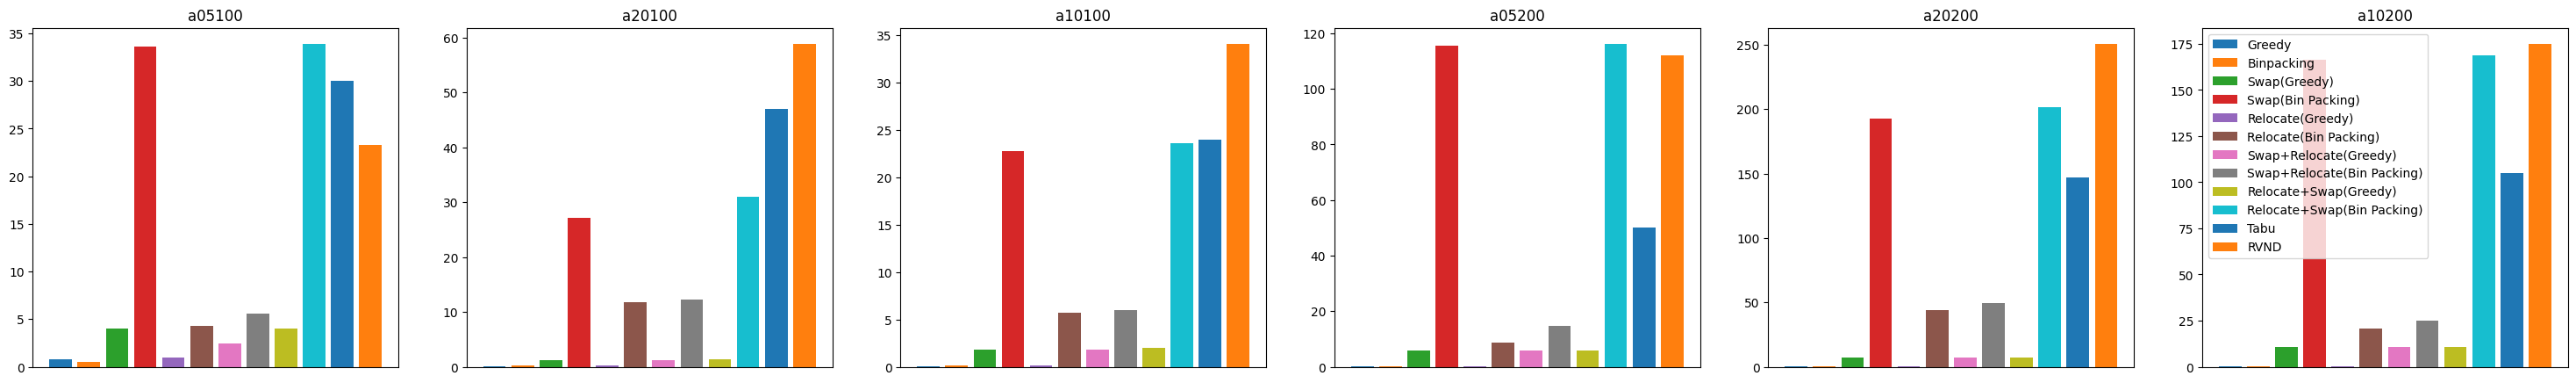

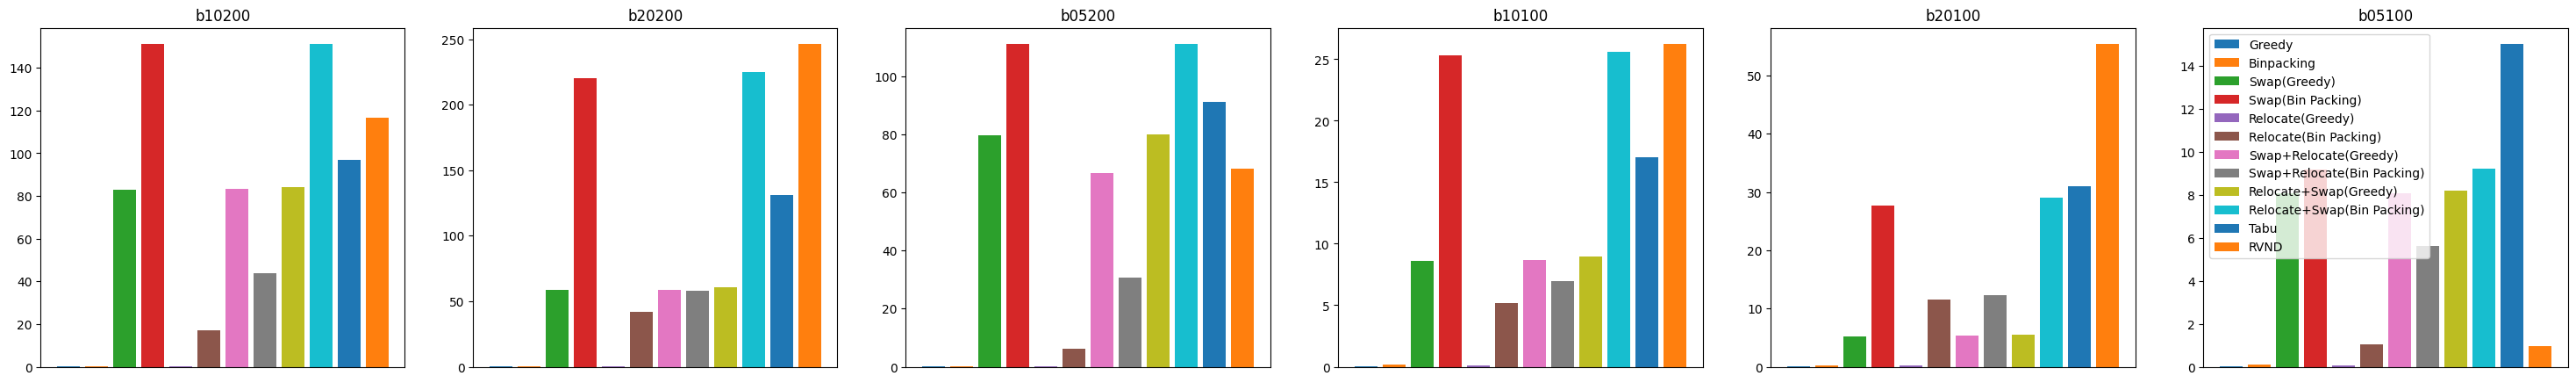

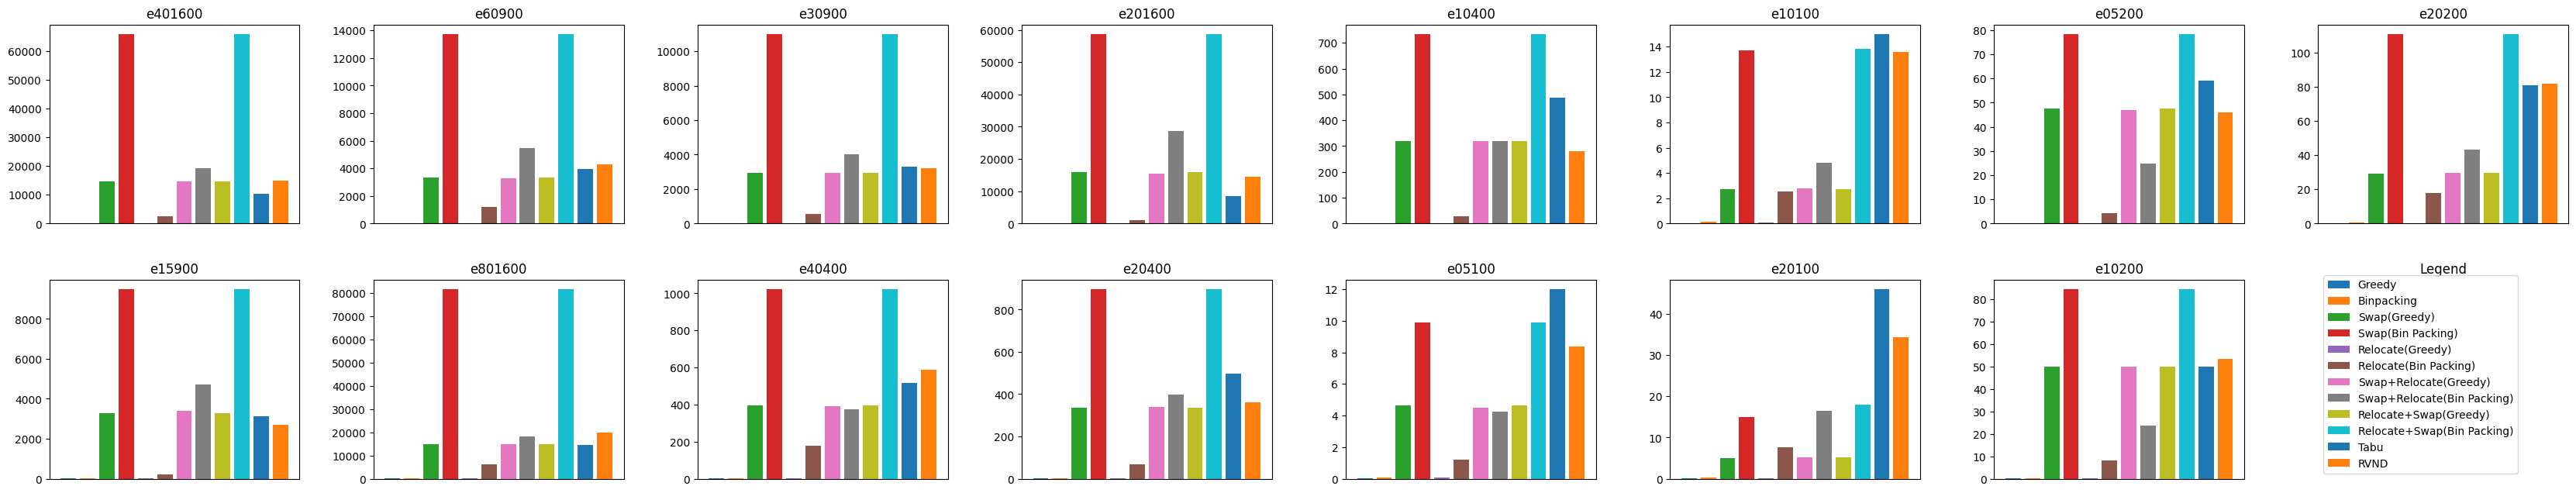

In [58]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_tiempo.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_tiempo.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_time"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_tiempo.png")

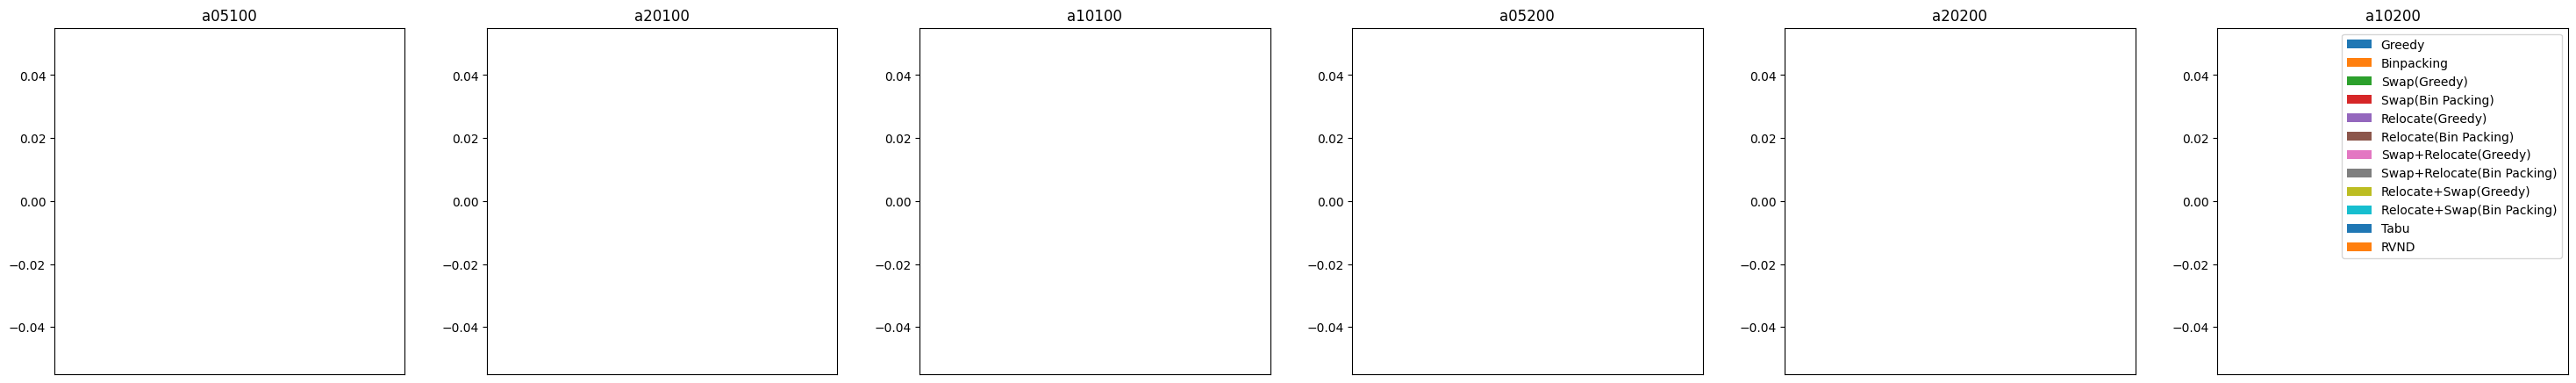

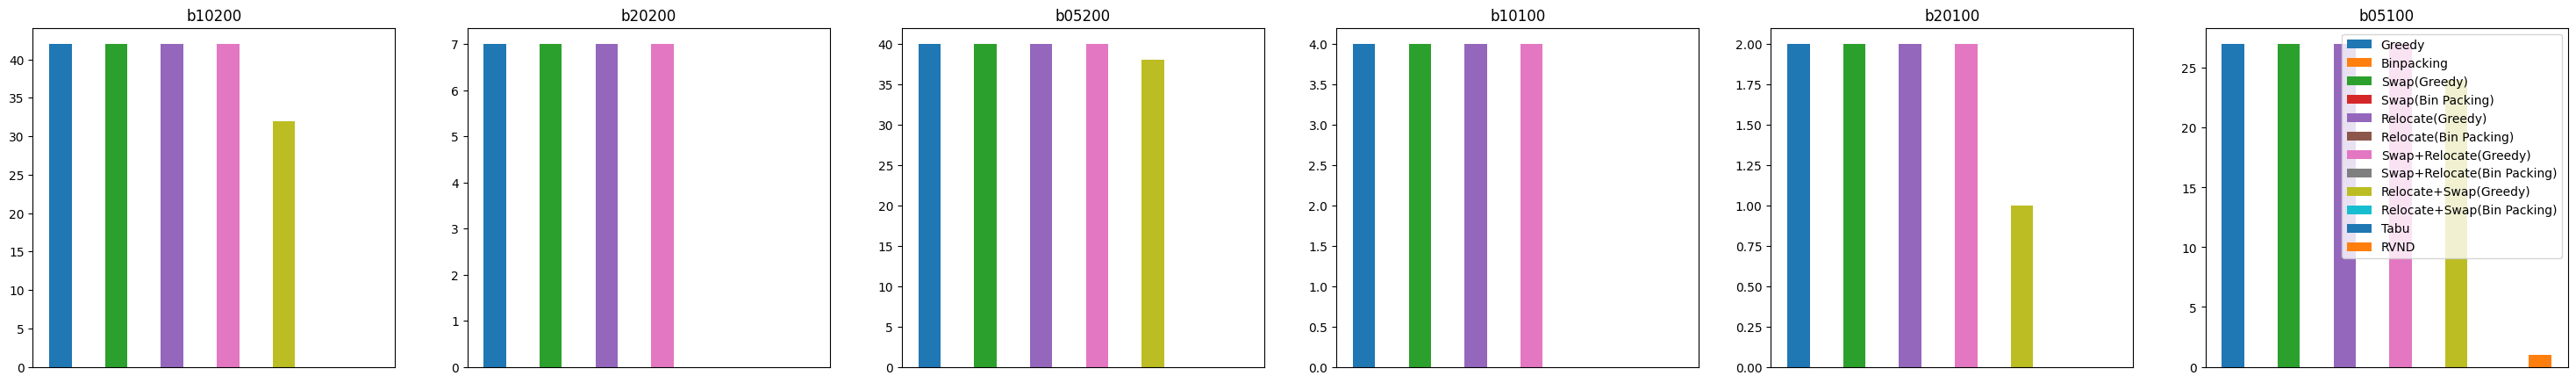

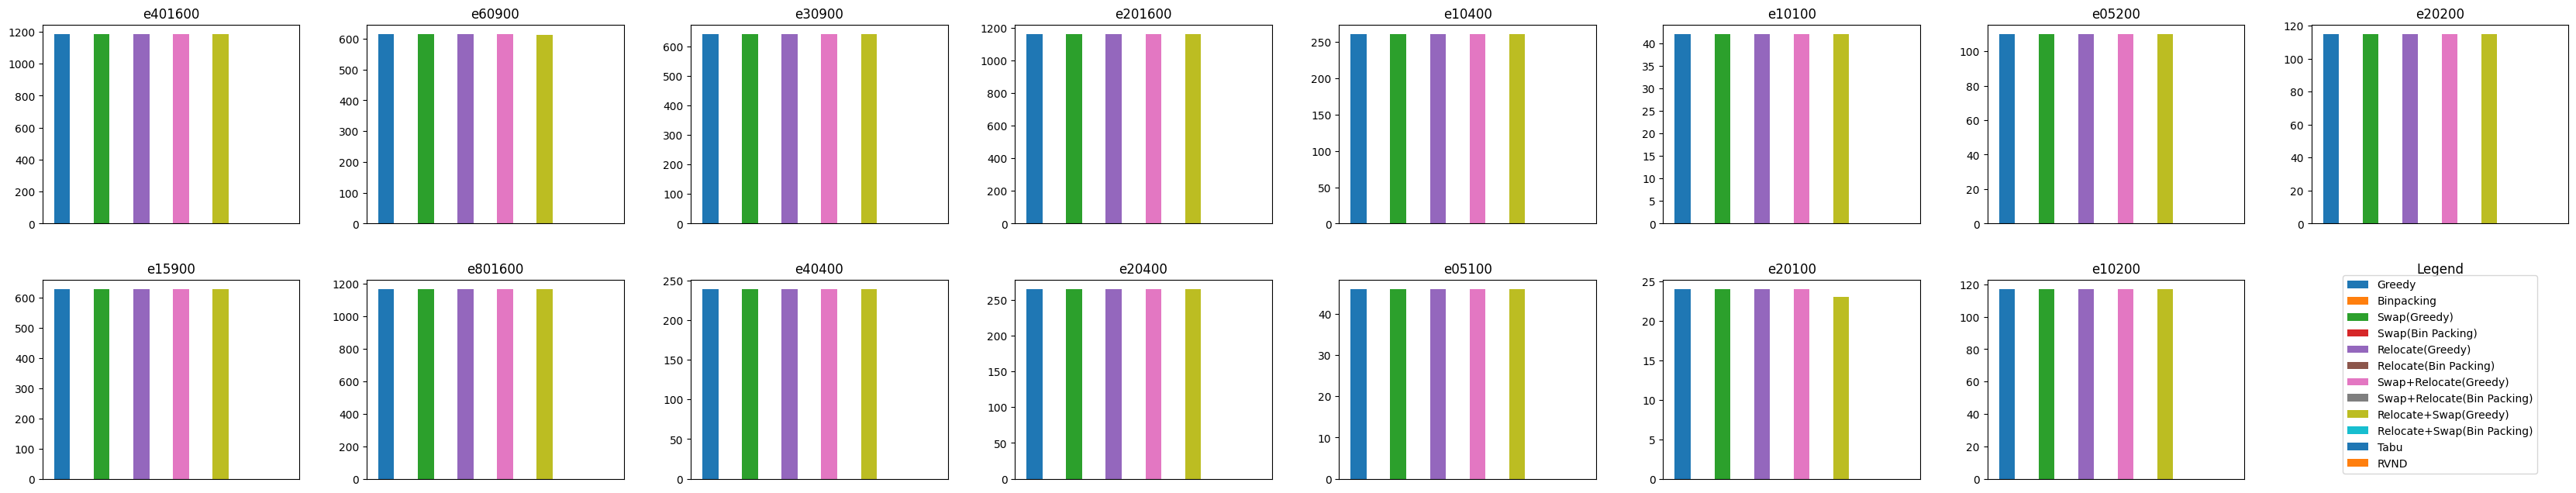

In [59]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_unassigned.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_unassigned.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_free"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_unassigned.png")

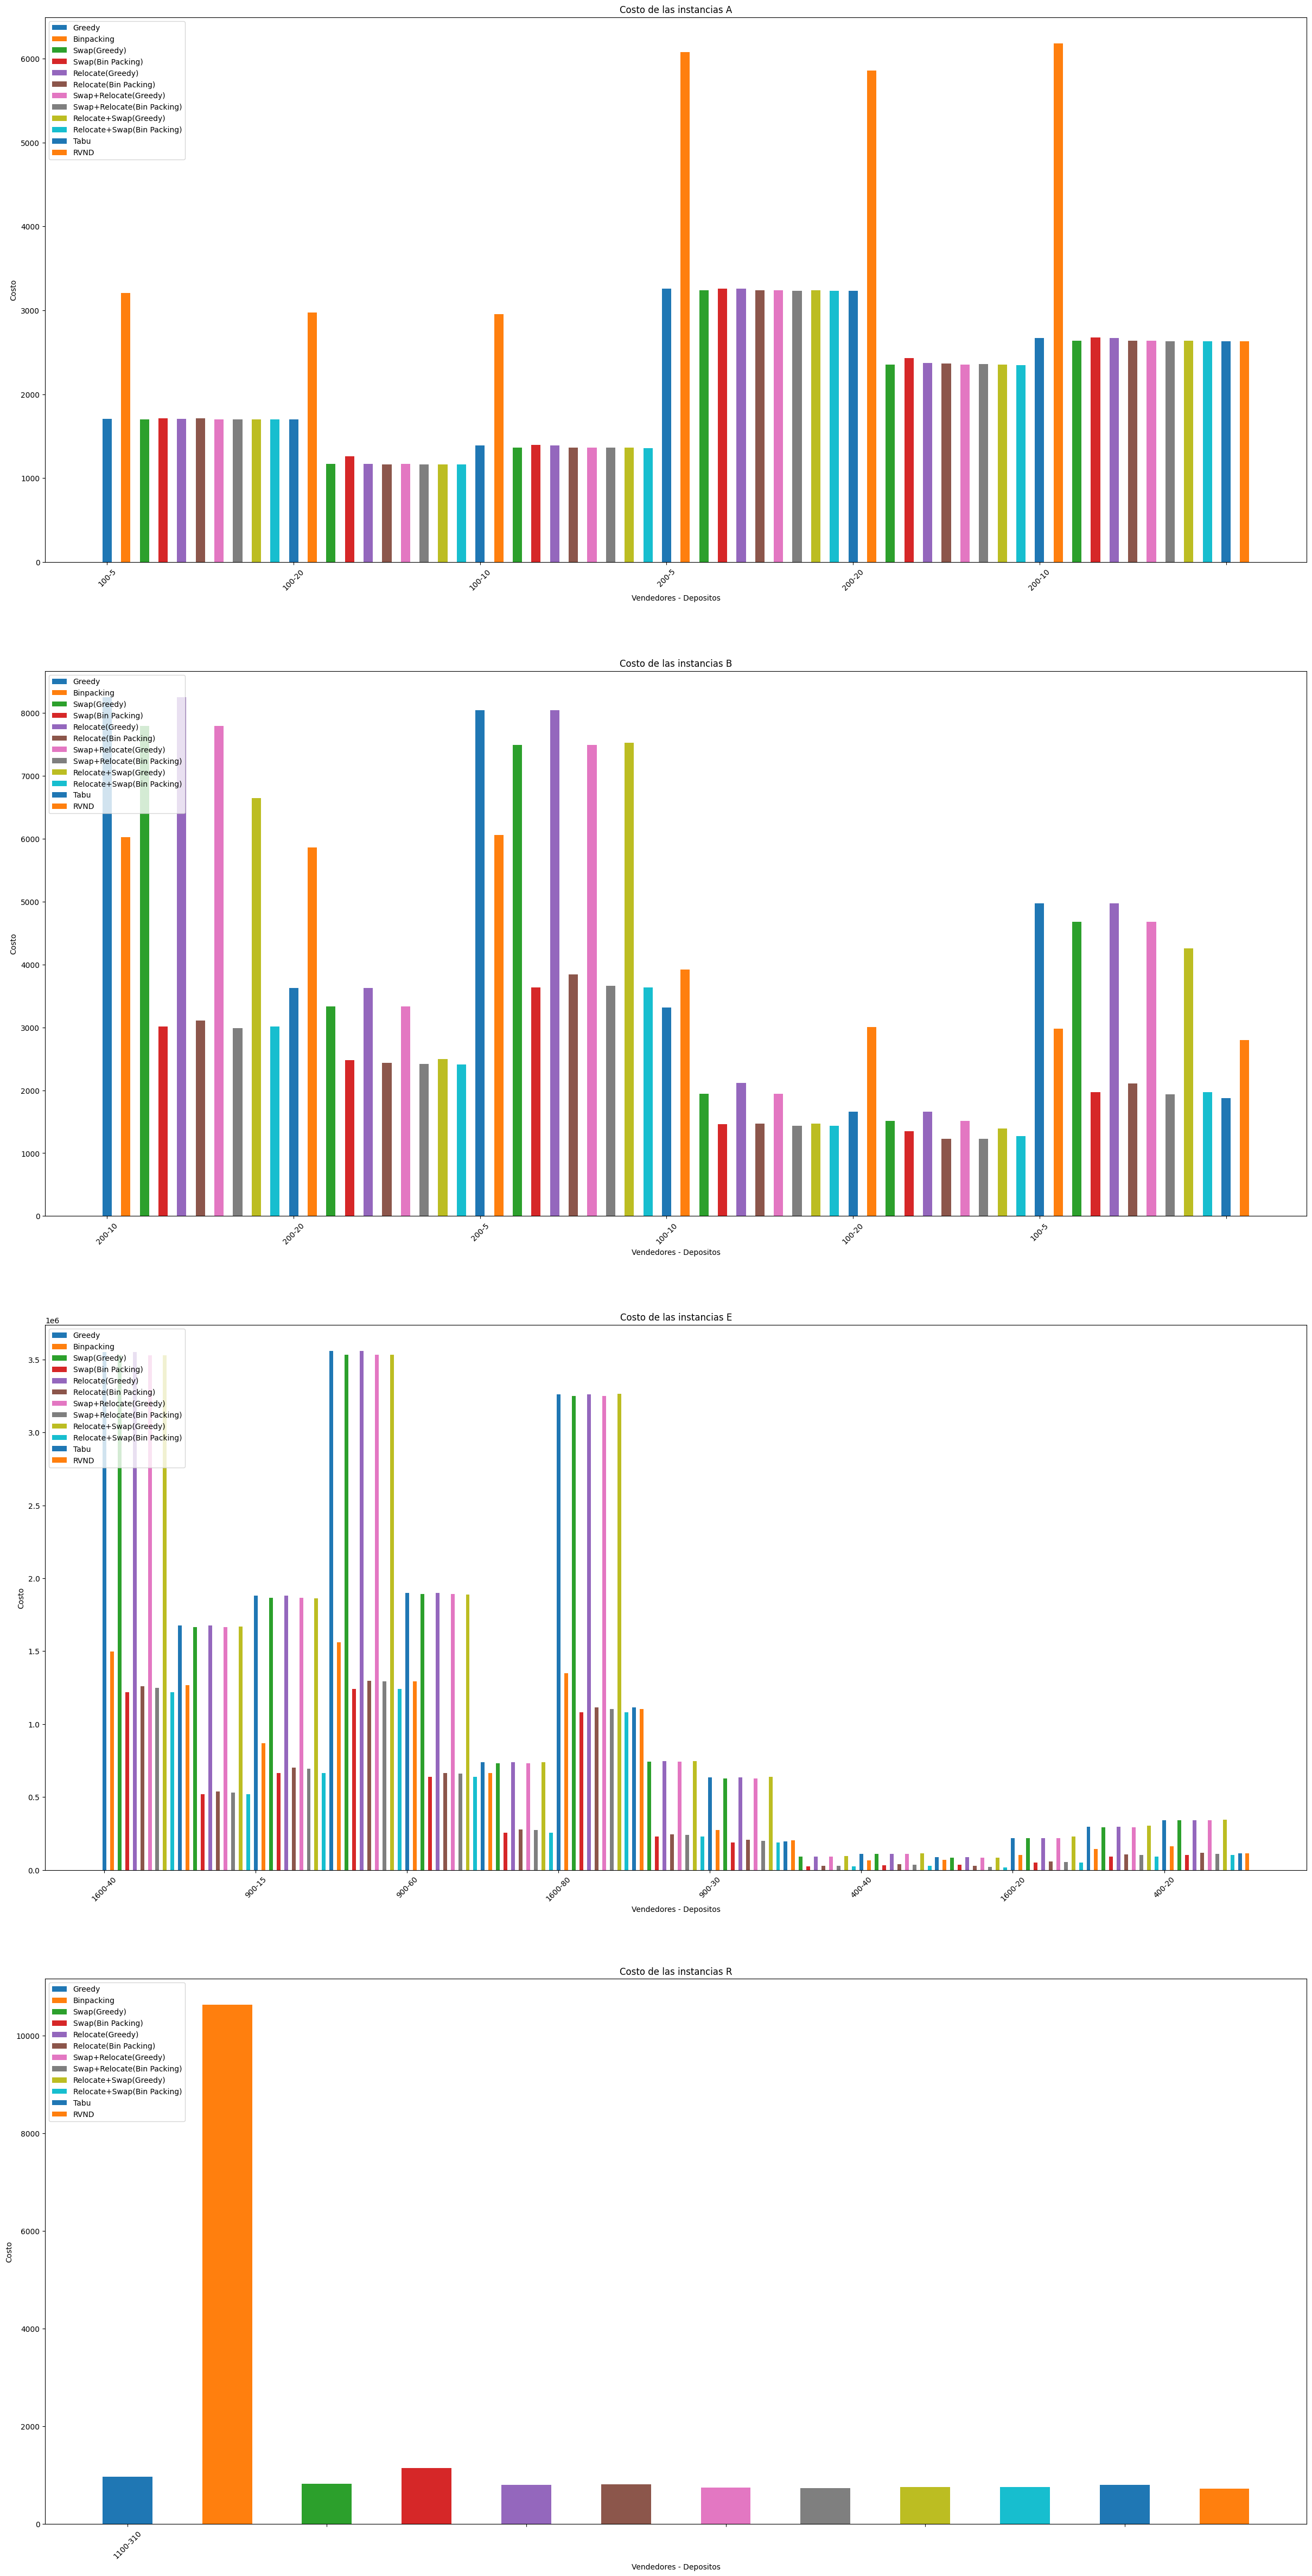

In [60]:
fig, axs = plt.subplots(len(costs), 1, figsize=(30, 60))

for i, cost in enumerate(costs):

    cost['Vendedores-Depositos'] = cost['Vendedores'].astype(str) + '-' + cost['Depositos'].astype(str)

    axs[i].set_title('Costo de las instancias ' + cost['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Costo')

    for h in heuristics:
        axs[i].bar(np.arange(len(cost['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, cost[h+"_cost"], width=0.05, label=h)

    axs[i].legend()

    # add division between 'Vendedores-Depositos'

    axs[i].set_xticklabels([""] + list(cost['Vendedores-Depositos']))



for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(costs[i]['Vendedores-Depositos']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')

    # leave some space between subplots



### 2. TIEMPOS

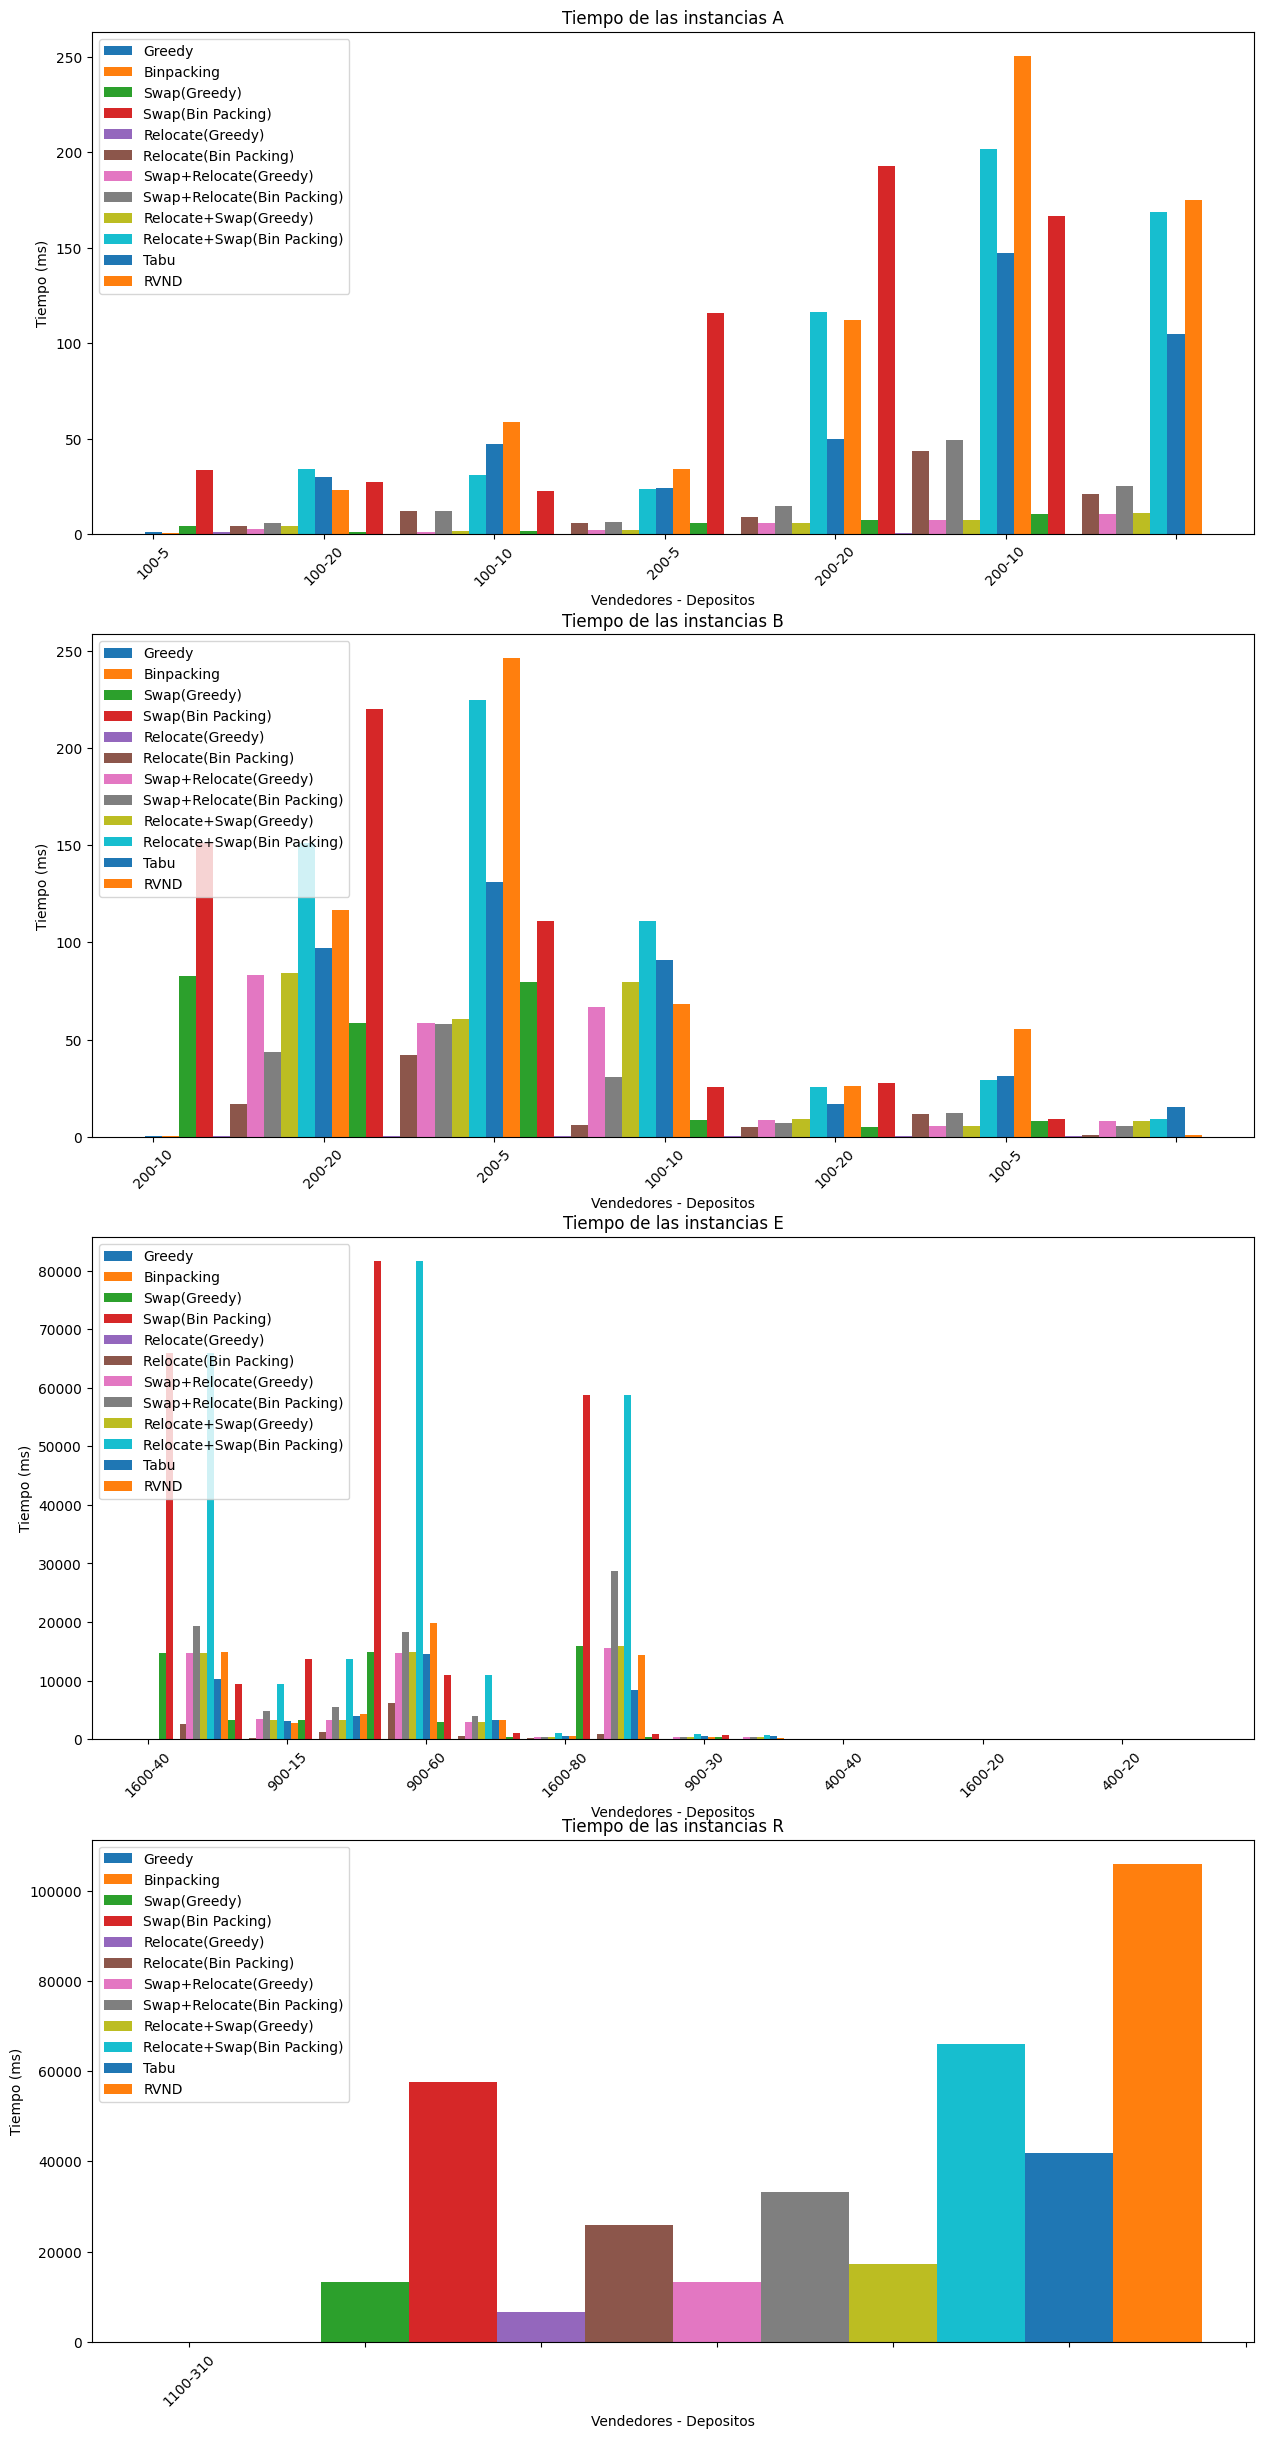

In [61]:
fig, axs = plt.subplots(len(times), 1, figsize=(15, 30))

for i, time in enumerate(times):

    time['Vendedores-Depositos'] = time['Vendedores'].astype(str) + '-' + time['Depositos'].astype(str)

    axs[i].set_title('Tiempo de las instancias ' + time['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(time['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, time[h+"_time"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(times[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


## Cantidad de vendedores sin asignar

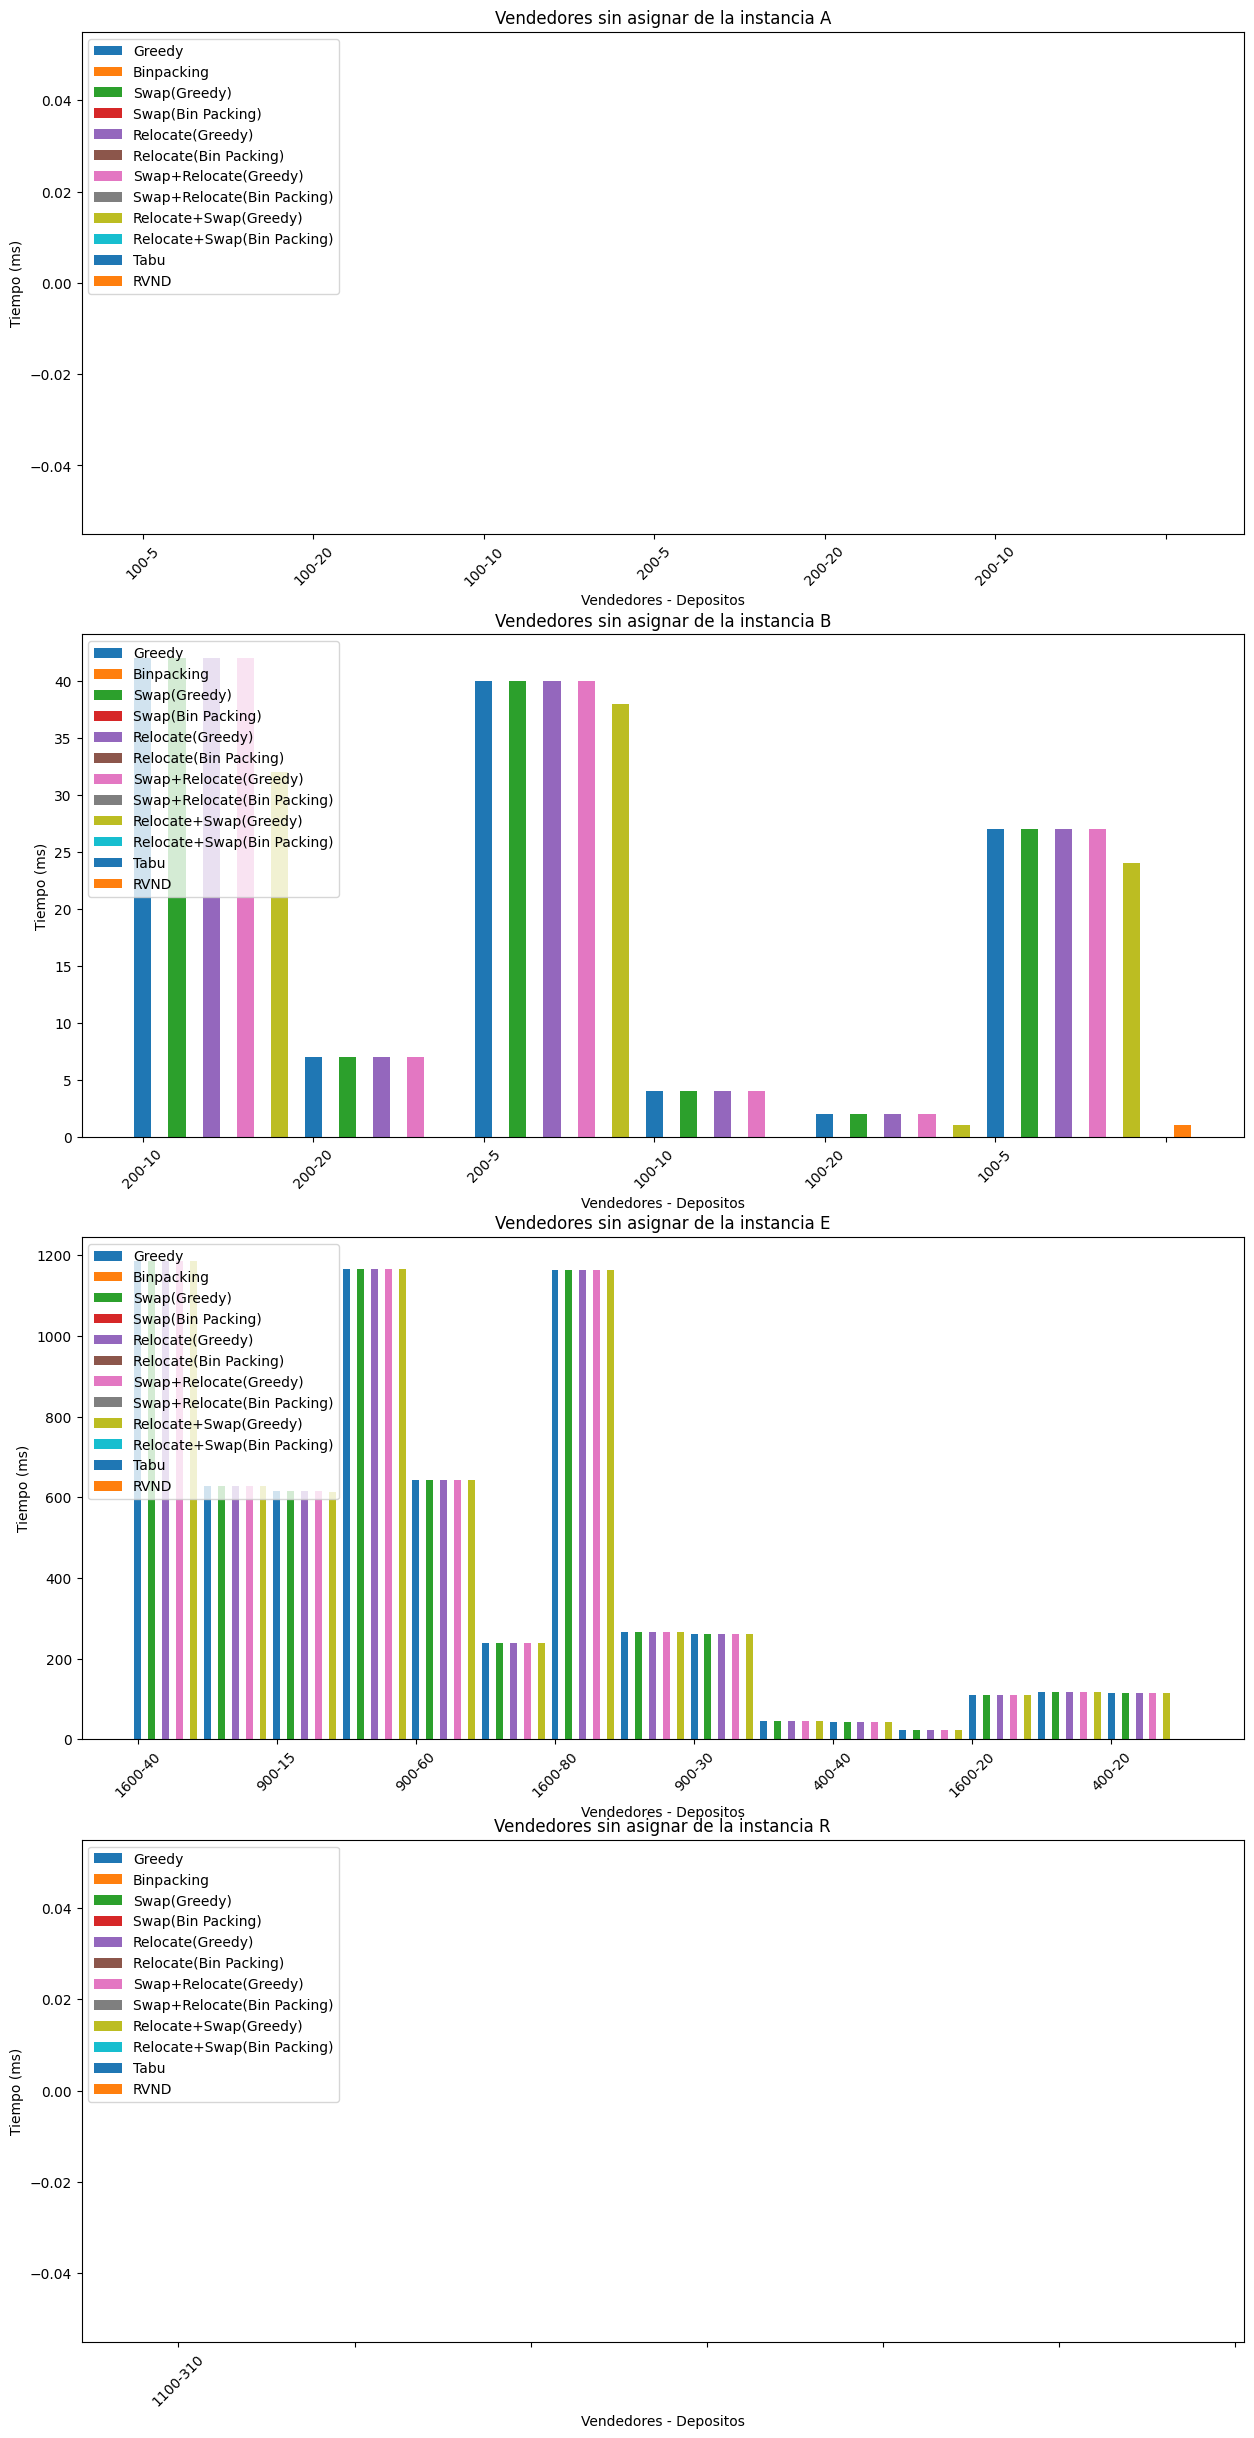

In [62]:
fig, axs = plt.subplots(len(frees), 1, figsize=(15, 30))

for i, free in enumerate(frees):

    free['Vendedores-Depositos'] = free['Vendedores'].astype(str) + '-' + free['Depositos'].astype(str)

    axs[i].set_title('Vendedores sin asignar de la instancia ' + free['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(free['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, free[h+"_free"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(frees[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


### 3. INSTANCIA REAL

In [63]:
real_instance[heuristics + '_cost']

,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Tabu_cost,RVND_cost
27,964.9,10629.0,824.8,1144.8,797.3,809.7,739.4,736.1,748.0,757.6,795.6,717.8


In [64]:
real_instance[heuristics + '_time']

,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Tabu_time,RVND_time
27,8.59667,36.0392,13363.6,57475.9,6685.53,25928.9,13226.5,33252.9,17335.4,65975.9,41893,105995.0


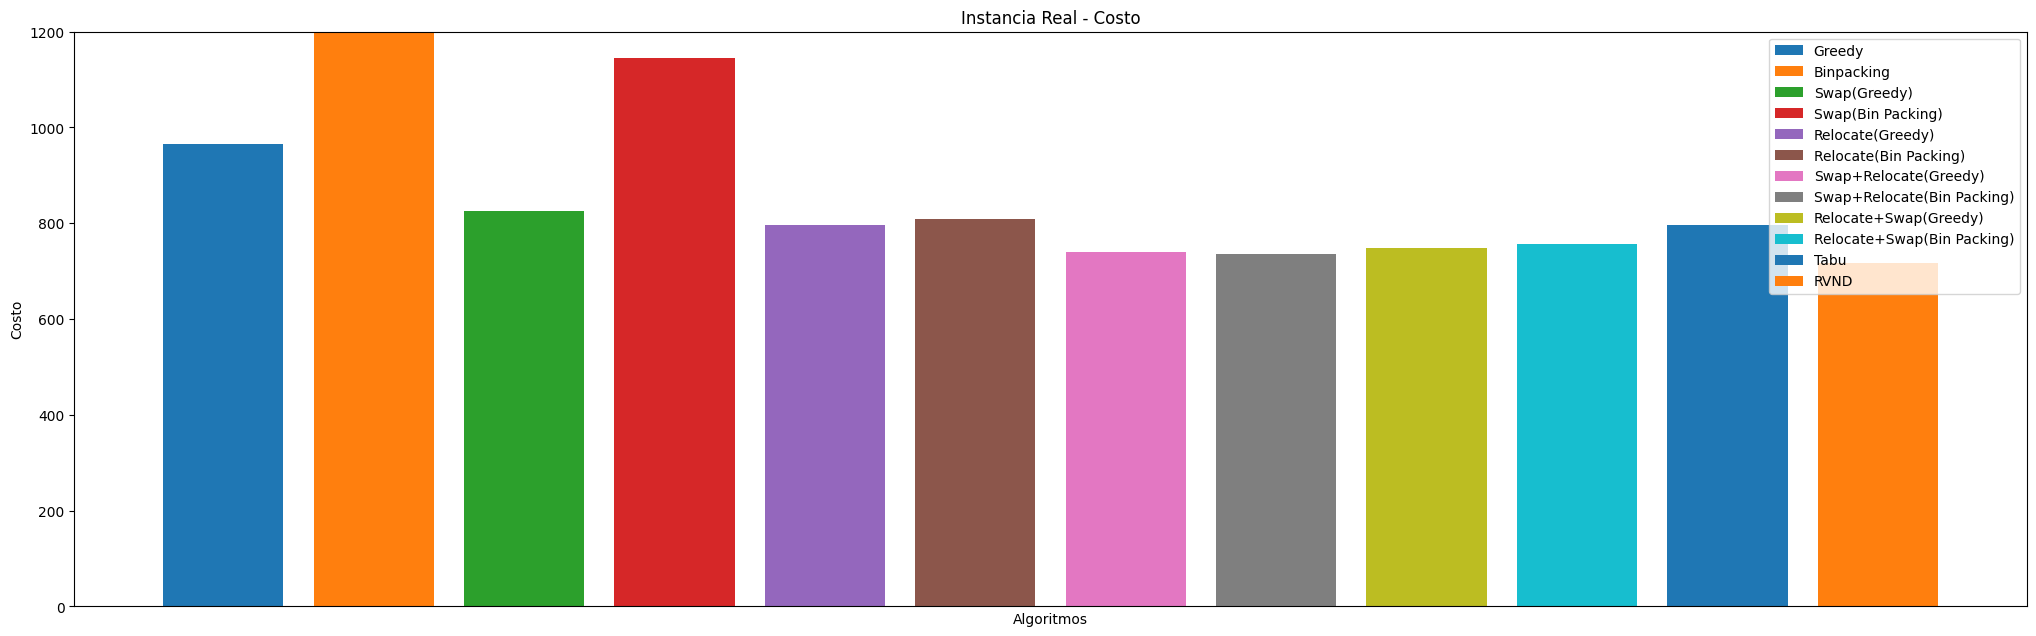

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_cost"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Costo")
    ax.set_title("Instancia Real - Costo")
    ax.set_ylim(0, 1200)

plt.legend()
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_real_cost.png")

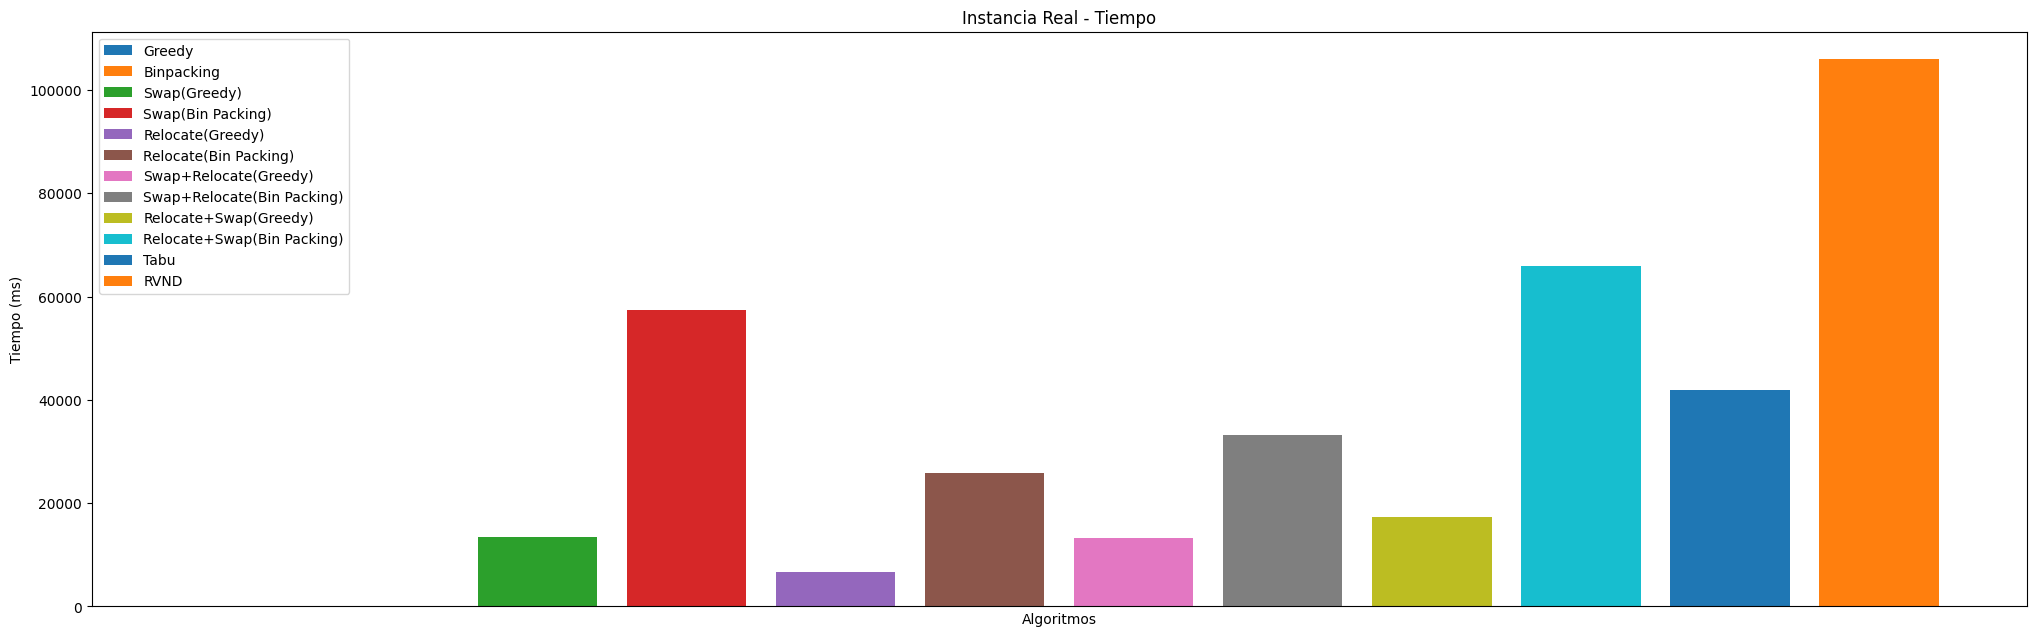

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_time"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Tiempo (ms)")
    ax.set_title("Instancia Real - Tiempo")
    # ax.set_ylim(0, 1000)

plt.legend()
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_real_time.png")

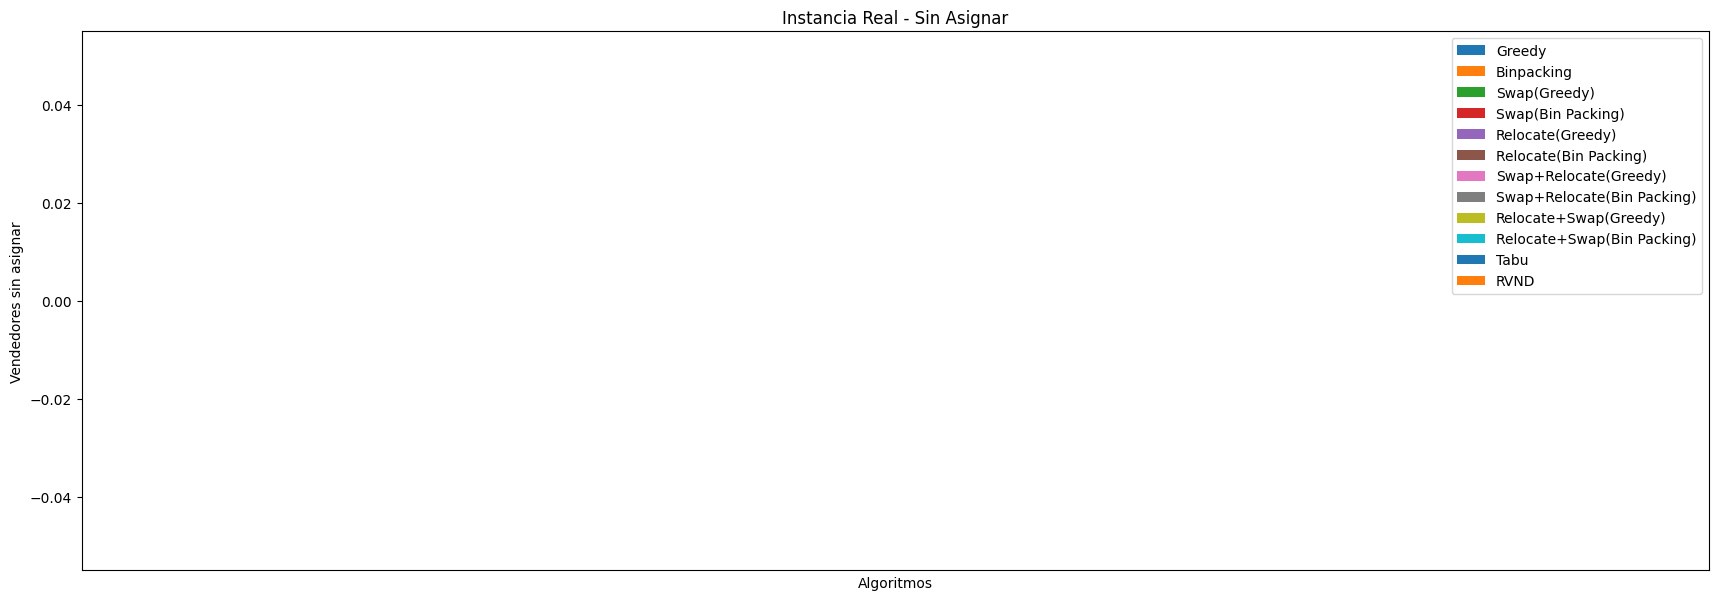

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_free"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Vendedores sin asignar")
    ax.set_title("Instancia Real - Sin Asignar")
    # ax.set_ylim(0, 1000)

plt.legend()

In [68]:
#Drop Filename column and InstanceGroup column
a_costs_table = costs[0].drop(columns=["Filename", "InstanceGroup", "Vendedores-Depositos"]).to_markdown(index=False)

pyperclip.copy(a_costs_table)

In [69]:
costs[-1]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Tabu_cost,RVND_cost,InstanceGroup,Vendedores-Depositos
27,real_instance,310,1100,964.9,10629.0,824.8,1144.8,797.3,809.7,739.4,736.1,748.0,757.6,795.6,717.8,r,1100-310


In [70]:
#Drop Filename column and InstanceGroup column
real_costs_table = costs[-1].drop(columns=["Filename", "InstanceGroup", "Vendedores-Depositos"]).to_markdown(index=False)

pyperclip.copy(real_costs_table)

In [73]:
real_instance.iloc[0]

Filename                           real_instance
Depositos                                    310
Vendedores                                  1100
Greedy_cost                                964.9
Greedy_time                              8.59667
Greedy_free                                    0
Binpacking_cost                          10629.0
Binpacking_time                          36.0392
Binpacking_free                                0
Swap(Greedy)_cost                          824.8
Swap(Greedy)_time                        13363.6
Swap(Greedy)_free                              0
Swap(Bin Packing)_cost                    1144.8
Swap(Bin Packing)_time                   57475.9
Swap(Bin Packing)_free                         0
Relocate(Greedy)_cost                      797.3
Relocate(Greedy)_time                    6685.53
Relocate(Greedy)_free                          0
Relocate(Bin Packing)_cost                 809.7
Relocate(Bin Packing)_time               25928.9
Relocate(Bin Packing